In [2]:
import pandas as pd


data_path = 'data/Fish.csv'
df = pd.read_csv(data_path)
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
# bream data만 추출
bream_df = df.loc[df['Species'] == 'Bream']
bream_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [10]:
# bream data의 Length2와 weight추출

bream_length = bream_df['Length2'].to_list() # 길이
bream_weight = bream_df['Weight'].to_list() # 무게

# to_list(): series data를 list형태로 변환해준다

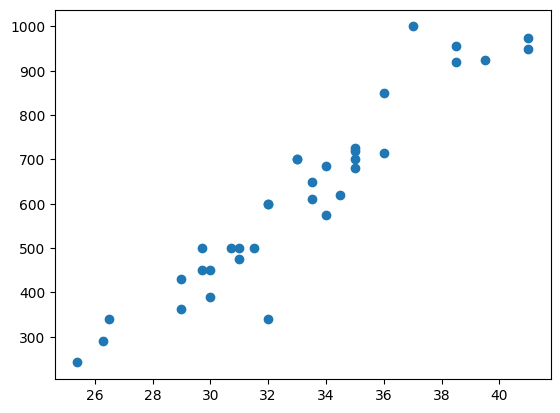

In [12]:
import matplotlib.pyplot as plt

# plot: 선그래프 / bar: 막대그래프 / scatter: 산점도
plt.scatter(bream_length, bream_weight)

In [15]:
smelt_df= df.loc[df['Species'] == 'Smelt']
# smelt_df

In [17]:
smelt_length = smelt_df['Length2'].to_list()
smelt_weight = smelt_df['Weight'].to_list()

Text(0, 0.5, 'weight')

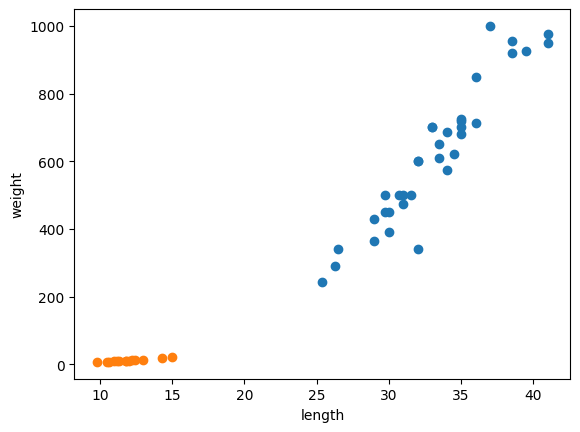

In [19]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')

---
## KNN(K-Nearest Neighbor / K 최근접 이웃)

In [20]:
length = bream_length + smelt_length
weight  = bream_weight + smelt_weight

In [23]:
# zip(): n개의 데이터를 순서에 맞게 한쌍으로 만들어준다
fish_data = [[l,w]for l, w in zip(length, weight)]
# fish_data

- 이진 분류: 0, 1로 구분

In [24]:
# 정답 데이터 생성(bream= 1, smelt = 0)
fish_target = [1] * len(bream_weight) + [0] * len(smelt_weight)

### sciktlearn

- install: pip install scikit-learn
- 기본적인 machin_learning 모델들을 물러 올 수 있다

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
kn = KNeighborsClassifier()

In [31]:
# fit(): 모델을 학습시키는 함수 / data와 답을 주고 학습 -> 지도학습이기때문
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [33]:
# score(): 해당 모델이 얼마나 정확한지 점수화
kn.score(fish_data, fish_target)

# 확률로 결과 출력 ex) 1.0 => 100%

1.0

In [35]:
# predict(): 예측을 지시하는 함수
kn.predict([[30, 600]]) # 2차원 data를 기대함으로 대괄호를 하나 더 씌워 줘야 한다

# 1(도미)로 예측

array([1])

In [37]:
kn.predict([[10, 20]]) # 2차원 data를 기대함으로 대괄호를 하나 더 씌워 줘야 한다

# 0(빙어)로 예측

array([0])

In [41]:
# n_neighbors = : 데이터 1개가 들어갔을때 참고할 이웃의 수 / default = 5

kn49 = KNeighborsClassifier(n_neighbors = 49) # 우리의 데이터 전체를 바라보게끔 설정

In [40]:
kn49.fit(fish_data,fish_target)
kn49.score(fish_data,fish_target)

0.7142857142857143